## Семинар 3 "Определение ключевых точек лица"

ФИО: Дегтярев Роман Олегович

# Подготовительная задача 1

Сделать из линейной регрессии nn.sequental двухслойную сеть

In [2]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [44]:
#Parameters:
_LR = 0.001
_BATCH_SIZE = 32
_EPOCH = 20
_EPS=1.00000e-02
_RAND_STATE = 42

In [4]:
#Load MNIST
to_numpy = lambda x: x.numpy()
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST('.', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [5]:
#network architecture 
class network_sigmoid(nn.Module):

    def __init__(self):
        super(network_sigmoid, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(784, 100),
            nn.Sigmoid()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(100, _BATCH_SIZE),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(_BATCH_SIZE,10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.fc(out)
        return out

In [10]:
fnn = network_sigmoid()

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(fnn.parameters(), lr=_LR)

# Подготовительная задача 2

Используя структуру сети Sequental в pytorch реализовать и обучить классификатор цифр из MNIST
(повторить первый и второй пункты из прошлого задания )

In [12]:
loss_train = []
for i in range(_EPOCH):
    for j,[image,label] in enumerate(train_loader):
        image = Variable(image)
        label = Variable(label)
        image = image.view(-1, 28*28)
        #print image.size()
        optimizer.zero_grad()
        result = fnn.forward(image)
        loss = loss_func(result,label)
        loss.backward()
        optimizer.step()
        if (loss.data.numpy()[0]<_EPS):
            break
        
        if j % 1000 == 0:
            loss_train.append(loss.data.numpy()[0])
            print(loss)

Variable containing:
 2.4007
[torch.FloatTensor of size 1]

Variable containing:
 0.3685
[torch.FloatTensor of size 1]

Variable containing:
 0.4875
[torch.FloatTensor of size 1]

Variable containing:
 0.1285
[torch.FloatTensor of size 1]

Variable containing:
 0.1601
[torch.FloatTensor of size 1]

Variable containing:
 0.1539
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-02 *
  7.4130
[torch.FloatTensor of size 1]

Variable containing:
 0.1592
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-02 *
  2.9365
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-02 *
  2.4029
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-02 *
  2.5841
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-02 *
  3.8106
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-02 *
  1.7011
[torch.FloatTensor of size 1]



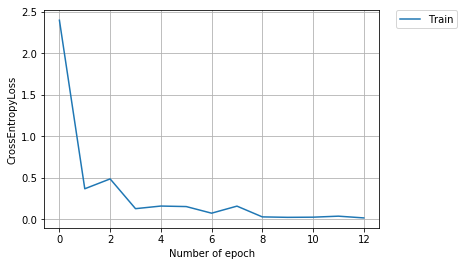

In [14]:
#Network with Sigmoid 
plt.plot(np.array(loss_train), label='Train')
plt.ylabel('CrossEntropyLoss')
plt.xlabel('Number of epoch')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [15]:
class network_ReLU(nn.Module):

    def __init__(self):
        super(network_ReLU, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(100, _BATCH_SIZE),
            nn.ReLU()
        )
        self.fc = nn.Linear(_BATCH_SIZE,10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.fc(out)
        return out

In [16]:
snn = network_ReLU()

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(snn.parameters(), lr=_LR)

In [17]:
loss_train = []
for i in range(_EPOCH):
    for j,[image,label] in enumerate(train_loader):
        image = Variable(image)
        label = Variable(label)
        image = image.view(-1, 28*28)
        #print image.size()
        optimizer.zero_grad()
        result = snn.forward(image)
        loss = loss_func(result,label)
        loss.backward()
        optimizer.step()
        if (loss.data.numpy()[0]<_EPS):
            break
        
        if j % 1000 == 0:
            loss_train.append(loss.data.numpy()[0])
            #print(loss)

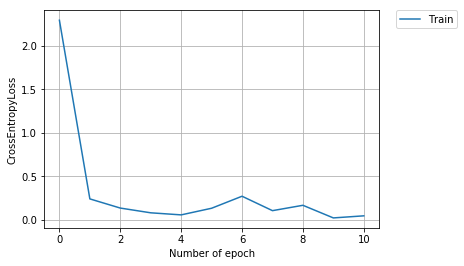

In [18]:
#Network with ReLU
plt.plot(np.array(loss_train), label='Train')
plt.ylabel('CrossEntropyLoss')
plt.xlabel('Number of epoch')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [19]:
#Для ReLU сошлось побыстрее

## Задание

Используя датасет из архива решите задачу регрессии для поиска 68-ми ключевых точек лица. 

Для обучения и валидации используйте изображения и разметку из папок train и test соответственно.

Попробуйте сети глубины 1 и 2 и разные активации (ELU, RELU и sigmoid).

Image name: 109.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[  7.  41.]
 [  8.  51.]
 [ 10.  60.]
 [ 13.  70.]]
(96, 96)


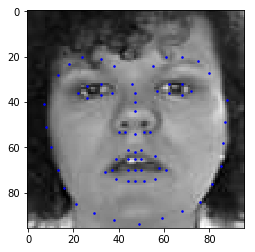

In [6]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 100
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    print(image.shape)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='b')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

In [21]:
class network_work1(nn.Module):
    def __init__(self):
        super(network_work1, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(96*96, 100),
            nn.BatchNorm1d(100,100),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(100, 100),
            nn.BatchNorm1d(100,100),
            nn.ReLU()
        )
        self.fc = nn.Linear(100,136)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.fc(out)
        return out

In [22]:
#X - это картинки, y - это координаты, 6221 rows in X

In [23]:
X = np.array([[io.imread(os.path.join('dataset/train/', im_name ))] for im_name in landmarks_frame.ix[:, 0]])

In [24]:
X.shape

(6221, 1, 96, 96)

In [25]:
X = X.reshape(-1,96,96)

In [12]:
landmarks_frame.head()

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0.jpeg,10,43,9,53,8,64,8,74,10,...,47,78,56,80,47,77,43,77,39,77
1,1.jpeg,9,32,8,42,9,52,12,62,15,...,48,74,53,76,48,77,46,77,42,77
2,10.jpeg,4,34,5,44,6,54,9,64,14,...,50,70,56,72,50,72,47,72,43,72
3,100.jpeg,12,41,13,51,15,60,17,70,21,...,54,72,61,71,54,73,51,73,47,73
4,1000.jpeg,8,46,9,55,10,64,12,73,16,...,54,65,62,70,54,72,50,72,46,71


In [13]:
landmarks_all = np.array([[landmarks_frame.ix[n, 1:].as_matrix().astype('float')] for n in range(0,landmarks_frame.shape[0])])

In [14]:
y = landmarks_all.reshape(-1,136)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=_RAND_STATE)

In [26]:
lnn1 = network_work1()

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(lnn1.parameters(), lr=_LR)

In [46]:
loss_train = []
for i in range(_EPOCH):
    for (image,label) in zip(X_train, y_train):
        image = Variable(torch.from_numpy(image))
        image = image.float()
        image = image.view(-1, 96*96)
        label = Variable(torch.from_numpy(label))
        label = label.float()
        optimizer.zero_grad()
        result = lnn1.forward(image)
        loss = loss_func(result,label)
        loss.backward()
        optimizer.step()
        if (loss.data.numpy()[0]<_EPS):
            break
        
    if i % 4 == 0:
        loss_train.append(loss.data.numpy()[0])
        print(loss)

Variable containing:
 140.5852
[torch.FloatTensor of size 1]

Variable containing:
 34.9767
[torch.FloatTensor of size 1]

Variable containing:
 14.0730
[torch.FloatTensor of size 1]

Variable containing:
 12.9083
[torch.FloatTensor of size 1]

Variable containing:
 12.8822
[torch.FloatTensor of size 1]



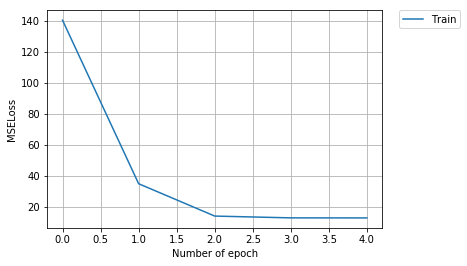

In [47]:
plt.plot(np.array(loss_train), label='Train')
plt.ylabel('MSELoss')
plt.xlabel('Number of epoch')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [48]:
out = lnn1(Variable(torch.from_numpy(X_test).view(-1, 96*96)).float())

In [49]:
out = out.data.numpy()

In [50]:
out = np.array([out[:,::2], out[:,1:][:,::2]])#[x,y]

In [51]:
out = out.reshape(-1,68,2)

(96, 96)


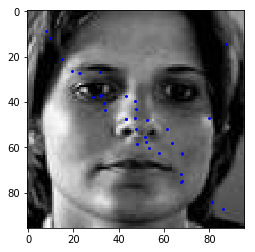

In [54]:
show_landmarks(X_test[2],out[2].reshape(-1, 2))

In [174]:
#ну такое